In [10]:
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats.distributions import chi2

import warnings
warnings.filterwarnings('ignore')

path = os.getcwd()

In [12]:
## pull name and attribute data on a particular NFT collection
contract_address = '0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D'
ALCHEMY_API_KEY = "YOUR ALCHEMY API KEY HERE"

from Func_download_metadata import fetch_collection_metadata # %run Func_download_metadata.ipynb

collection_name, metadata = fetch_collection_metadata(contract_address, ALCHEMY_API_KEY, output = True, path = path)

Page 1, page number 0x0000000000000000000000000000000000000000000000000000000000000064
Page 2, page number 0x00000000000000000000000000000000000000000000000000000000000000c8
Page 3, page number 0x000000000000000000000000000000000000000000000000000000000000012c
Page 4, page number 0x0000000000000000000000000000000000000000000000000000000000000190
Page 5, page number 0x00000000000000000000000000000000000000000000000000000000000001f4
Page 6, page number 0x0000000000000000000000000000000000000000000000000000000000000258
Page 7, page number 0x00000000000000000000000000000000000000000000000000000000000002bc
Page 8, page number 0x0000000000000000000000000000000000000000000000000000000000000320
Page 9, page number 0x0000000000000000000000000000000000000000000000000000000000000384
Page 10, page number 0x00000000000000000000000000000000000000000000000000000000000003e8
Page 11, page number 0x000000000000000000000000000000000000000000000000000000000000044c
Page 12, page number 0x000000000000000000

Page 95, page number 0x000000000000000000000000000000000000000000000000000000000000251c
Page 96, page number 0x0000000000000000000000000000000000000000000000000000000000002580
Page 97, page number 0x00000000000000000000000000000000000000000000000000000000000025e4
Page 98, page number 0x0000000000000000000000000000000000000000000000000000000000002648
Page 99, page number 0x00000000000000000000000000000000000000000000000000000000000026ac
✅ Saved 10000 NFTs in /BoredApeYachtClub_Adress_0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D_metadata.csv


{'No of independent trait pairs (ITP)': 17, 'No of total trait pairs (TTP)': 21, 'ITP/TTP': 0.8095238095238095}


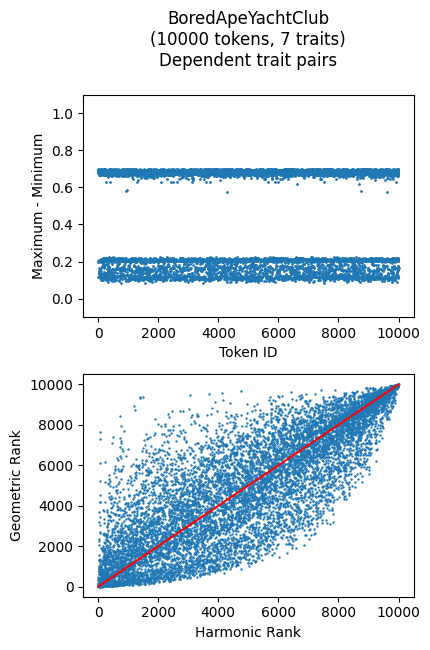

In [2]:
# import metadata from local drive 
collection_name, contract_address = 'BoredApeYachtClub', '0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D'
# collection_name, contract_address = 'Doodles', '0x8a90cab2b38dba80c64b7734e58ee1db38b8992e'
# collection_name, contract_address = 'PudgyPenguins', '0xbd3531da5cf5857e7cfaa92426877b022e612cf8' #PudgyPenguins
metadata  = pd.read_csv(path + '/' + collection_name + '_Address_' + contract_address + '_metadata.csv',index_col=0)

# run rarity functions
from Func_rarity import rarity # %run Func_rarity.ipynb

rc = rarity(metadata, padding = True, save_output = False, path = path, name = collection_name, 
            plotting = True, plt_xaxis='Harmonic', plt_yaxis='Geometric', ind_sig = 0.99, save_graph = False)

rc.run()

In [3]:
rc.attr_prob

,Background_count,Clothes_count,Earring_count,Eyes_count,Fur_count,Hat_count,Mouth_count
0,0.1273,0.0412,0.0882,0.0243,0.0265,0.2256,0.0208
1,0.1273,0.0224,0.7023,0.0049,0.0265,0.2256,0.0713
2,0.1266,0.1886,0.7023,0.0487,0.0265,0.0304,0.0710
3,0.1291,0.0203,0.7023,0.1714,0.0406,0.2256,0.0202
4,0.1242,0.0334,0.7023,0.0710,0.0778,0.0107,0.0241
...,...,...,...,...,...,...,...
9995,0.1170,0.0221,0.7023,0.0710,0.0511,0.2256,0.2272
9996,0.1232,0.0232,0.0882,0.0487,0.1352,0.2256,0.0505
9997,0.1291,0.0284,0.7023,0.1714,0.1229,0.0324,0.0116
9998,0.1283,0.0140,0.7023,0.0394,0.1370,0.2256,0.0438


In [4]:
rc.rarity_metrics

,Harmonic_value,Geometric_value,Arithmetic_value,max-min,TN_Harmonic_value,TN_Geometric_value,TN_Arithmetic_value,Harmonic_score,Harmonic_rank,TN_Harmonic_score,TN_Harmonic_rank,Geometric_score,Geometric_rank,TN_Geometric_score,TN_Geometric_rank,Arithmetic_score,Arithmetic_rank,TN_Arithmetic_score,TN_Arithmetic_rank
0,0.040031,0.054333,0.079129,0.2048,369.793801,503.166049,792.081871,0.164244,3856.0,0.159149,5849.0,0.179593,1815.0,0.196524,4977.0,0.212160,1514.0,0.296899,3831.0
1,0.022279,0.063543,0.168614,0.6974,211.770069,478.867849,1066.456140,0.065311,422.0,0.073313,1152.0,0.227377,3256.0,0.183489,4453.0,0.616472,6213.0,0.440206,6560.0
2,0.058395,0.089696,0.170586,0.6758,538.140169,730.525484,1129.748538,0.266581,7855.0,0.250593,8632.0,0.363066,7200.0,0.318497,7997.0,0.625379,6476.0,0.473263,7324.0
3,0.049008,0.092597,0.187071,0.6821,368.593093,619.485113,1202.894737,0.214271,6145.0,0.158497,5815.0,0.378118,7509.0,0.258926,6803.0,0.699864,8335.0,0.511468,8054.0
4,0.034773,0.063471,0.149071,0.6916,251.946957,359.017605,683.140351,0.134940,2535.0,0.095136,2150.0,0.227004,3249.0,0.119193,1889.0,0.528174,4078.0,0.239999,2393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.071642,0.118988,0.202329,0.6802,556.222238,916.175658,1477.964912,0.340409,9085.0,0.260415,8791.0,0.515045,9244.0,0.418093,9095.0,0.768799,9345.0,0.655137,9339.0
9996,0.061016,0.078826,0.099229,0.2024,492.634096,676.798200,954.760234,0.281193,8197.0,0.225875,8148.0,0.306673,5725.0,0.289673,7483.0,0.302976,2392.0,0.381867,5391.0
9997,0.039904,0.079677,0.171157,0.6907,289.986824,450.975105,880.549708,0.163531,3822.0,0.115799,3282.0,0.311086,5840.0,0.168525,3874.0,0.627961,6555.0,0.343106,4766.0
9998,0.049790,0.094496,0.184343,0.6883,352.210405,613.839710,1161.421053,0.218628,6332.0,0.149598,5294.0,0.387974,7712.0,0.255898,6747.0,0.687536,8096.0,0.489806,7662.0


In [5]:
rc.independ

,Background,Clothes,Earring,Eyes,Fur,Hat,Mouth
Background,NaN,359,40,149,109,282,219
Clothes,361,NaN,271,995,760,1961*,1372
Earring,66,314,NaN,126,125,269*,174
Eyes,198,1050,173,NaN,377,1163*,675
Fur,166,868,145,464,NaN,628,529
Hat,307,1680,267,888,735,NaN,1332*
Mouth,276,1501,241,794,658,1267,NaN


In [6]:
rc.cramersV

,Background,Clothes,Earring,Eyes,Fur,Hat,Mouth
Background,NaN,0.0716,0.0257,0.0461,0.0395,0.0635,0.056
Clothes,NaN,NaN,0.0672,0.0673,0.065,0.0738,0.0655
Earring,NaN,NaN,NaN,0.0459,0.0456,0.067,0.0538
Eyes,NaN,NaN,NaN,NaN,0.0458,0.0727,0.0554
Fur,NaN,NaN,NaN,NaN,NaN,0.0591,0.0542
Hat,NaN,NaN,NaN,NaN,NaN,NaN,0.0645
Mouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
rc.ind_pair_result

{'No of independent trait pairs (ITP)': 17,
 'No of total trait pairs (TTP)': 21,
 'ITP/TTP': 0.8095238095238095}